<a id='top'></a>
# *Лабораторын ажил 11: B221910802*

``linkpred`` бол холбоосыг таамаглах шинжилгээ хийх *unsupervised* буюу удирдлагагүй машин сургалтын алгоритмуудыг хэрэгжүүлэхэд туслах зорилготой бичигдсэн python хэлний сан юм.

Энэ хичээлээр бид уг сангийн тухай болон уг сан дахь гол гол функцуудыг танилцуулах, мөн тэдгээрийг хэрэглэгжүүлэхийг зорилоо.

## Агуулга

1. Хэрхэн уг санг суулгах [Installing LinkPred](#install)
2. Таамаглах алгоритмын бүтэц, ажиллагаа[Prediction Workflow](#workflow)
    1. Өгөгдлийг файлаас оруулах[Loading the network from file](#graph)
    2. Удирдлагагүй сургалтын таамаглагчийг тооцоолох [Computing the desired unsupervied predictors](#pred)
    3. Ялгаатай таамаглагчидын үнэлгээ болон харьцуулалт [Evaluation and comparison of different predictors](#eval)
3. Дүгнэлт [Conclusions](#conclusion)

<a id='install'></a>
## 1. LinkPred санг суулгах

Эхний алхам бол,  ``linkpred`` санг суулгах бөгөөд амжилттай суусан тохиолдолд уг сангийн функцүүдтэй ажиллах боломжтой болно.

Санг суулгахдаа ``pip`` ашиглаж болно.

In [ ]:
!pip install linkpred

  Preparing metadata (setup.py) ... done
  Created wheel for smokesignal: filename=smokesignal-0.7.0-py3-none-any.whl size=6030 sha256=c9aee6b583f9af9190e694727dde620a300ab1d73d45d3c2c446dc9ebb86a997
  Stored in directory: /root/.cache/pip/wheels/dd/61/b2/4d7520f5b9b3e236bdef080edef4420f2203711b8f9279015f
Successfully built smokesignal


``linkpred`` сан амжилттай суусан эсэхийг шалгахдаа дараах байдлаар кодондоо оруулж ирж болж байна уу гэж үзнэ.

In [ ]:
import linkpred

<a id='workflow'></a>
## 2. Таамаглах үйл явцын дараалал

``linkpred`` нь дараах 3-н үе шаттайгаар Холбоосыг таамаглах үйл явцыг биелүүлдэг.

1. Сүлжээгээ байгуулах - Network Loading
2. Таамаглагчаа сонгох, аппликейшн - Predictor selection and application
3. Үр дүн үнэлэх - Results evaluation

<a id='graph'></a>
### 2.A Файлаас уншиж сүлжээг байгуулах

Эхлээд, ``linkpred`` нь файлаас графыг уншихыг шаарддаг. Бид энэ удаа  Game of Thrones Season 6-ын ирмэгүүдийн мэдээллийг ашиглана.

Сангуудыг импортлох буюу дуудах шаардлагатай. Үүнд matplotlib, networkx сангууд орно. NetworkX бол Python хэл дэх олон төрлийн сүлжээний бүтцийг үүсгэх, засварлах, судлах боломжийг олгодог сан юм. Энэ нь нийгмийн, биологийн болон дэд бүтцийн сүлжээг шинжлэх хэрэгслүүдийг хангахын зэрэгцээ том хэмжээний өгөгдөлтэй хялбар ажиллах боломжийг олгодог. matplotlib сан нь график, диаграмм зурах, өгөгдлийн визуализаци хийхэд ашиглагдана.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

Энэхүү хэсэсгт CSV файлуудаас Game of Thrones киноны 6-р улирал дахь дүрүүд хоорондын харилцааны өгөгдлийг уншиж, NetworkX ашиглан сүлжээ (график) байгуулж байна.

In [ ]:
from google.colab import drive  # Google Drive руу хандах сан

# Google Drive хандаж өгөгдөл авахад бэлтгэх
drive.mount('/content/drive')

def read_net_w(filename):
    g = nx.Graph()  # Хоосон граф үүсгэх
    with open(filename) as f:
        f.readline()# Толгой болох эхний мөрийг алгасах
        # Мөр бүрийн хувьд давталт гүйлгэн
        for l in f:
            l = l.split(",")  # Таслалаар хязгаарлан өгөгдлийн утгуудыг унших
            g.add_edge(l[0], l[1], weight=int(l[2])) # 2 оройг холбосон ирмэгийг нэмэх ба ингэхдээ ирмэгийн жингийн утгыг бас нэмнэ
    return g  # Үүсгэсэн графаа буцаах

# Өмнө тодорхойлсон функцээ ашиглан файлаас графаа үүсгэнэ
g = read_net_w(f'/content/drive/My Drive/asioaf/got-s6-edges.csv')

Mounted at /content/drive


Үүсгэсэн графаа networkx сангийн draw функцийг ашигилан зурж харна.

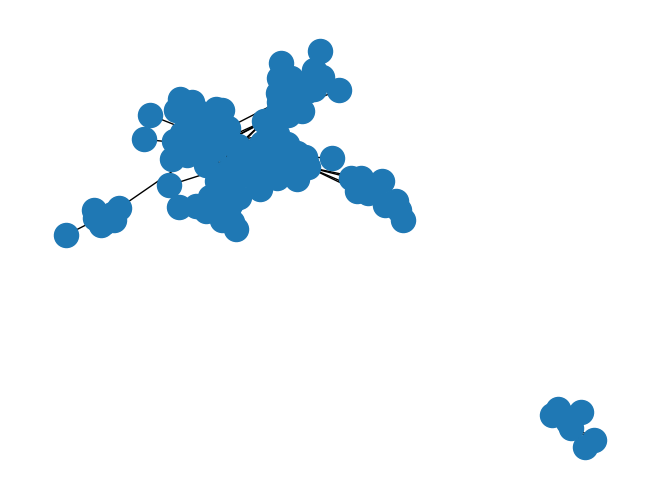

In [ ]:
nx.draw(g)

<a id='pred'></a>
### 2.B Удирдлагагүй сургалтын таамаглагч тооцоолох

``linkpred`` нь 4 бүлэг удирдлагагүй сургалтын таамаглагчид өргөн хэрэглэгдэж байна. Үүнд:
- **Neighborhood буюу хөршүүдэд суурилсан арга:**
    - *AdamicAdar*, AssociationStrength, *CommonNeighbours*, Cosine, DegreeProduct, *Jaccard*, MaxOverlap, MinOverlap, NMeasure, Pearson,ResourceAllocation
- **Paths буюу зайн хэмжүүрт суурилсан арга:**
    - GraphDistance, *Katz*
- **Ranking буюу эрэмбэлэх арга:**
    - *SimRank*, RootedPageRank
- **Miscellanea буюу бусад:**
    - Community, Copy, *Random*
    
Энэ лаборатороор бид цөөн хэдэн аргыг орууллаа.

Энгийн ойлгомжтой байлгахын тулд бид сонгогдсон таамаглагч бүрт топ-5 нь үр дүнг харууллаа.

#### 2.B.1 Neighborhood

Эхний хэсэг бүлэг таамаглагч бол зангилаа бүрийн хувьд холбогдох боломжтой хос оройг уг хоёр оройн хөрш оройнуудтайгаа хэр хүчтэй сул холбогдсон байдлаас үүдэн холбоосыг үүсэх эсэх магадлалаар олдог.
 </br>
Энэ төрлийн таамаглагчид нь дараах асуултанд хариулт олохыг хичээдэг.
 *How many friend we have to share in order to become friends?*

##### **Common Neighbors**

Илүү олон дундын найзуудтай бол бид найз болох магадлал өндөр байна.

Дараах код нь дундын найзтай боловч хоорондоо шууд холбоо үүсгээгүй дүрүүдийн хувьд ирээдүйд холбогдох магадлал хамгийн өндөр 5 дүрийг хэвлэн харуулж байна.

In [ ]:
# Оршин байгаа оройнуудыг оролцуулахгүйгээр Common Neighbors таамаглагчийг g графд үүсгэх
cn = linkpred.predictors.CommonNeighbours(g, excluded=g.edges())
# Ирээдүйд үүсэх боломжит ирмэгүүдэд оноог нь тооцоолох
cn_results = cn.predict()

#Хамгийн өндөр оноотой 5 холбоосийг хадгалах
top = cn_results.top(5)
#Тэдгээрийн хувьд оройнууд болон оноог хэвлэнэ
for edge, score in top.items():
    print(edge, score)

TOMMEN - MACE 8.0
NED - LADY_CRANE 8.0
NED - CLARENZO 8.0
MARGAERY - IZEMBARO 8.0
MARGAERY - ARYA 8.0


##### **Jaccard**
Топологи бүтэц болон аттрибутуудын ижил төсөөтэй байдал нь найз болох эсэхийг тодорхойлно.

Өөрөөр хэлбэл, Jaccard алгоритм нь хоёр оройн нийтлэг хөршүүдийн тоог нийт хөршүүдийн тоонд хувааж оноог тооцдог бөгөөд өндөр оноо авсан хосууд ирээдүйд хоорондоо холбогдох магадлал өндөртэй гэж үздэг. Дараах үр дүн нь одоогоор холбоогүй оройнуудын хооронд хамгийн өндөр Jaccard оноотой хосуудыг харуулж байна.

In [ ]:
# Оршин байгаа оройнуудыг оролцуулахгүйгээр Jaccard таамаглагчийг g графд үүсгэх
jc = linkpred.predictors.Jaccard(g, excluded=g.edges())
# Ирээдүйд үүсэх боломжит ирмэгүүдэд оноог нь тооцоолох
jc_results = jc.predict()

# Хамгийн өндөр оноотой 5 холбоосийг хадгалах
top = jc_results.top(5)
# Тэдгээрийн хувьд оройнууд болон оноог хэвлэнэ
for edge, score in top.items():
    print(edge, score)


RED_PRIEST - KINVARA 1.0
LITTLE_SAM - DICKON 1.0
TOMMEN - MACE 0.7272727272727273
JOFFREY - CAMELLO 0.7272727272727273
OLD_NAN - BENJEN 0.7142857142857143


##### **Adamic Adar**
Бидний дундын найзын тоо нь биднийг найз болох эсэхийг тодорхойлоход ашиглагдана.

Гэхдээ Adamic-Adar алгоритм нь нийтлэг хөршүүдийн тоог тоолохоос гадна тэр хөршүүдийн ховор байдлыг илүү чухалчилдаг — ховор хөрштэй байх нь өндөр оноо өгдөг. Доорх үр дүн нь одоогоор холбоогүй оройнуудын хооронд хамгийн өндөр Adamic-Adar оноотой хосуудыг харуулж байна.

In [ ]:
# Оршин байгаа оройнуудыг оролцуулахгүйгээр Adamic-Adar таамаглагчийг g графд үүсгэх
aa = linkpred.predictors.AdamicAdar(g, excluded=g.edges())
# Ирээдүйд үүсэх боломжит ирмэгүүдэд оноог нь тооцоолох
aa_results = aa.predict()

# Хамгийн өндөр оноотой 5 холбоосийг хадгалах
top = aa_results.top(5)
# Тэдгээрийн хувьд оройнууд болон оноог хэвлэнэ
for edge, score in top.items():
    print(edge, score)


TOMMEN - MACE 3.1875572810307893
NED - LADY_CRANE 3.1263711657257836
NED - CLARENZO 3.1263711657257836
SANSA - ROBB 3.096644315133246
JOFFREY - CAMELLO 2.8944937119329137


#### 2.B.2 Paths

Хоёрдогч төрлийн таамаглагчид нь хос оройн хоорондын зайнаас хамаарч тэд ирээдүйд холбогдох эсэхийг магадлаар боддог.
</br>
Энэ төрлийн таамаглагчид нь дараах асуултад хариулт олохыг хичээдэг: *How distant are we?*


##### **Katz**
Katz алгоритм нь хоёр оройн хоорондох бүх боломжит замуудыг тооцож, тэдгээрийн уртаас хамаарч жин өгдөг. Өөрөөр хэлбэл, богино замууд илүү жинтэй гэж үздэг бөгөөд урт замууд бага нөлөөтэй. Доорх үр дүн нь одоогоор холбоогүй оройнуудын хооронд хамгийн өндөр Katz оноотой хосуудыг харуулж байна.

In [ ]:
# Оршин байгаа оройнуудыг оролцуулахгүйгээр Katz таамаглагчийг g графд үүсгэх
kz = linkpred.predictors.Katz(g, excluded=g.edges())
# Ирээдүйд үүсэх боломжит ирмэгүүдэд оноог нь тооцоолох
kz_results = kz.predict()

# Хамгийн өндөр оноотой 5 холбоосийг хадгалах
top = kz_results.top(5)
# Тэдгээрийн хувьд оройнууд болон оноог хэвлэнэ
for edge, score in top.items():
    print(edge, score)



LADY_CRANE - JAQEN 0.005571576860773001
SANSA - ALLISER_THORNE 0.004234378077202
TYRION - DAARIO 0.004145905054793999
CERSEI - BRIENNE 0.0038862606857720003
MELISANDRE - LYANNA_MORMONT 0.0035937193855959996


##### **Graph Distance**
Графын зай буюу Distance нь хоёр оройн хоорондын богино замын уртаар тодорхойлогдоно.
Өөрөөр хэлбэл, Graph Distance нь хоёр оройн хамгийн богино замын уртаар үндэслэн таамаглал гаргадаг. Өөрөөр хэлбэл, богино замтай хосууд ирээдүйд холбогдох магадлал өндөртэй гэж үздэг бөгөөд оноо бага байх тусам илүү ойр гэж тооцогдоно. Доорх үр дүн нь одоогоор холбоогүй оройнуудын хооронд хамгийн ойр байрлалтай хосуудыг харуулж байна.

In [ ]:
# Оршин байгаа оройнуудыг оролцуулахгүйгээр Graph Distance таамаглагчийг g графд үүсгэх
gd = linkpred.predictors.GraphDistance(g, excluded=g.edges())
# Ирээдүйд үүсэх боломжит ирмэгүүдэд оноог нь тооцоолох
gd_results = gd.predict()

# Хамгийн ойрхон байрлалтай 5 холбоосийг хадгалах
top = gd_results.top(5)
# Тэдгээрийн хувьд оройнууд болон оноог хэвлэнэ
for edge, score in top.items():
    print(edge, score)


LADY_CRANE - JAQEN 36.136054421768705
TYRION - DAARIO 30.29268292682927
CERSEI - BRIENNE 28.44827586206896
MELISANDRE - LITTLEFINGER 23.427491305005294
CERSEI - BRONN 23.294117647058822


#### 2.B.3 Rankig
Гуравдагч бүлэг таамаглагчид нь граф дахь хос оройнуудын байрлалаас хамаарч холбогдох магадлалыг тооцоолно.
 </br>
Дараах асуултанд хариулж буй байдлаас хамаарч тодорхойлогдоно: *How similar are we?

##### **SimRank**
Хоёр зангилаа холбоосоор холбогдохын тул тэдгээрийн хөрш оройнууд ижил төсөөтэй байх хэрэгтэй. Өөрөөр хэлбэл:
“If two nodes are similar, then their neighbors should also be similar.”

Иймээс хөршүүдийн бүтцийн төсөөтэй байдал нь оройн хоорондын ирээдүйн холболтын магадлалыг тодорхойлно. Доорх үр дүн нь одоогоор холбоогүй оройнуудын хооронд SimRank-ийн хамгийн өндөр оноотой хосуудыг харуулж байна.

In [ ]:
# Оршин байгаа оройнуудыг оролцуулахгүйгээр SimRank таамаглагчийг g графд үүсгэх
simrank = linkpred.predictors.SimRank(g, excluded=g.edges())
# Ирээдүйд үүсэх боломжит ирмэгүүдэд оноог нь тооцоолох (c = decay factor)
simrank_results = simrank.predict(c=0.5)

# Хамгийн өндөр оноотой 5 холбоосийг хадгалах
top = simrank_results.top(5)
# Тэдгээрийн хувьд оройнууд болон оноог хэвлэнэ
for edge, score in top.items():
    print(edge, score)


MAESTER_CITADEL - MAESTER_AEMON 0.3920701611834253
RAY - GATINS 0.3886464843365491
GATINS - BERIC 0.3675791855431439
THOROS - GATINS 0.3636591552182033
MAESTER_AEMON - GILLY 0.319889623157789


#### 2.B.4 Miscellanea
Энэ нь холбоосыг таамаглахдаа санамсаргүй байдлаар сонгож авдаг.
 </br>
``linkpred`` groups here approaches that are commonly used as baselines.

##### **Random**
Санамсаргүй байдлаар таах. Энэ нь хамгийн энгийн baseline таамаглагч юм. Ямар нэгэн логик, хөршийн бүтэц, эсвэл холболтын мэдээлэл ашиглахгүй, зүгээр л санамсаргүй байдлаар оройн хосуудыг сонгон магадлал өгдөг. Үүнийг голчлон бусад алгоритмуудыг харьцуулах суурь болгон ашигладаг.

In [ ]:
# Random таамаглагчийг үүсгэх (оршин байгаа ирмэгүүдийг орхино)
rnd = linkpred.predictors.Random(g, excluded=g.edges())
# Таамаглал хийх
rnd_results = rnd.predict()

# Хамгийн өндөр оноотой 5 холбоосыг авах (энд оноо бол утгагүй, зүгээр санамсаргүй)
top = rnd_results.top(5)
# Үр дүнг хэвлэх
for edge, score in top.items():
    print(edge, score)


LANCEL - KEVAN 0.9998723603482418
RAZDAL - AREO 0.9998446611770268
OLLY - MELESSA 0.9997451068697903
LEM - ARTHUR_CHILD 0.9996991664462803
TRYSTANE - ROBIN 0.9996200174674053


<a id='eval'></a>
### 2.C Ялгаатай таамаглагчидын харьцуулах болон үнэлэх
Холбоосуудыг үүсэх эсэхийг таамаглахдаа бид сургалтын болон тестийн өгөгдлүүдтэй ажиллаж шалгана. Өгөгдлөө сургалтын болон тестийн болгон хуваах шаардлагатай.

**random** сан нь санамсаргүй тоонууд үүсгэх, санамсаргүй үйлдлүүд хийх, жишээлбэл санамсаргүй оройг сонгох эсвэл өгөгдлийг хуваахад ашиглагддаг. Мөн **itertools** сан нь итераторуудтай ажиллахад зориулсан хэрэгслүүдийг хангадаг, жишээлбэл, хослол, пермутаци, Картианы нийлбэр үүсгэх боломжийг олгодог. Харин **linkpred.evaluation** сангаас **Pair**-г импортлон авч, хоёр оройн хоорондох хослолыг төлөөлдөг. Энэ нь холбоосын таамаглал хийх болон графын орой хоорондын холбоосын магадлалыг тооцоолохдоо чухал үүрэг гүйцэтгэдэг.

In [ ]:
import random
import itertools
from linkpred.evaluation import Pair

# Тестийн сүлжээний өгөгдлийг унших
test = read_net_w(f'/content/drive/My Drive/asioaf/got-s7-edges.csv')

# Сургалтын өгөгдөл: Тест сүлжээний өгөгдлийг сургалтын фазад орхино
training = g.copy()

# Оройнуудыг авна
nodes = list(g.nodes())
nodes.extend(list(test.nodes()))

# Тестийн сүлжээний бүх ирмэгүүдийг Pair объект болгон хадгалах
test = [Pair(i) for i in test.edges()]

# Бүх боломжит хосуудыг үүсгэх (Node-уудын хоорондох бүх хосууд)
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0] != i[1]])


Дараагаар нь бид сургалтын өгөгдөл дээрээ таамаглагчаа ажиллуулна. Энэхүү хэсэгт бид Common Neighbours, Adamic Adar болон Jaccard алгоритмуудыг авч үзэх гэж байна.

In [ ]:
# Common Neighbours хувьд сургалтын өгөгдөл дээрээ таамаглагчаа ажиллуулна
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())
cn_results = cn.predict()

# Adamic Adar хувьд сургалтын өгөгдөл дээрээ таамаглагчаа ажиллуулна
aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())
aa_results = aa.predict()

# Jaccard хувьд сургалтын өгөгдөл дээрээ таамаглагчаа ажиллуулна
jc = linkpred.predictors.Jaccard(training, excluded=training.edges())
jc_results = jc.predict()

Тэгээд бид тестийн өгөгдлөө ашиглан таамаглагч хэр үнэн таамаглаж буй үнэлнэ. Link Prediction хувьд ихэвчлэн performance p-н хувьд ratio тооцох, ROC гэх мэт precision, recall зэргийг ашиглан үнэлгээ хийдэг.

Дараах хэсэгт ашиглаж буй `linkpred.evaluation.EvaluationSheet` функц нь нарийвчлал (Precision), сануулга (Recall), F1 оноо, дундаж нарийвчлал (Average Precision), ROC AUC (Curve дор талбай) болон дундаж нарийвчлалын оноо (MAP) зэрэг хэмжүүрүүдийг буцааж, таамагласан холбоосуудыг бодит холбоосуудтай харьцуулан холбоосын таамаглалын алгоритмын үнэлгээг хийнэ.

In [ ]:
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)
aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)

Үр дүнгүүдээ тайлбарлахдаа бид ROC -ийн муруй ашиглан дүрслэнэ.

***Fallout (Хуурамч эерэгийн хэмжээ, FPR)*** нь сөрөг жишээнүүдийн дотор буруу эерэг гэж ангилагдсан хувь хэмжээг илэрхийлдэг, үүнийхээ тулд хуурамч эерэгүүдийг бодит сөрөг жишээнүүдийн нийт тоонд хуваана.

***Recall (Жинхэнэ эерэгийн хэмжээ, TPR)*** нь эерэг жишээнүүдийн дотор жинхэнэ эерэг гэж зөв ангилагдсан хувь хэмжээг илэрхийлдэг, үүнийхээ тулд жинхэнэ эерэгүүдийг бодит эерэг жишээнүүдийн нийт тоонд хуваана.

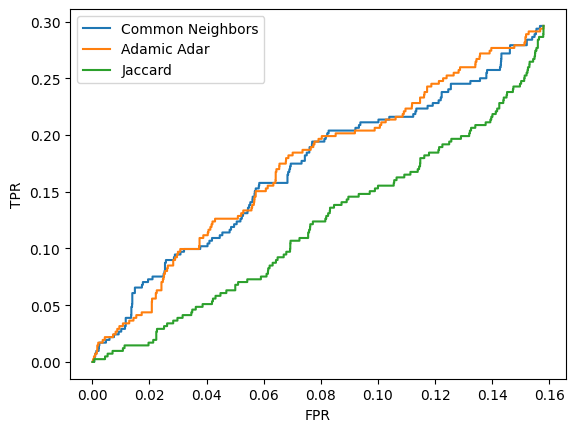

In [ ]:
# Common Neighbors алгоритм хувьд fallout (FPR) vs recall (TPR) зурах
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")

# Adamic Adar algorithm алгоритм хувьд fallout (FPR) vs recall (TPR) зурах
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")

# Jaccard algorithm алгоритм хувьд fallout (FPR) vs recall (TPR) зурах
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")

# y тэнхлэгийг "TPR" (True Positive Rate) гэж нэрлэх
plt.ylabel("TPR")

# x-тэнхлэгийг "FPR" (False Positive Rate) гэж нэрлэх
plt.xlabel("FPR")

# Гурван шулууныг ялгах legend нэмэх
plt.legend()

# Графыг дэлгэцэнд харуулах
plt.show()


Дээрх үр дүнд гарч ирж буй график нь холбоос таамаглах гурван өөр алгоритмын (Common Neighbors, Adamic-Adar, Jaccard) Receiver Operating Characteristic (ROC) муруйг харуулж байна. Муруйнуудыг харьцуулахад Adamic-Adar алгоритм нь False Positive Rate (FPR)-ийн өгөгдсөн утгад True Positive Rate (TPR) нь ерөнхийдөө илүү өндөр байгаа нь ихэнх муруйн дагуух хязгаарт жинхэнэ холбоосуудыг илүү сайн тодорхойлж, хуурамч эерэг таамаглалыг багасгаж байгааг харуулж байна. Jaccard индекс нь доод талын ROC муруйгаар харахад гурван алгоритм дундаа хамгийн сул үзүүлэлттэй байна.

Үр дүнгээ нэгтгэн тайлбарлах, дүгнэхэд хамгийн тохиромжтой, энгийн арга нь ROC муруй болон үүн дээр AUC бодож үзэх юм. AUC нь алгоритм хэр сайн ажиллаж байгааг харуулдаг ба илүү өндөр утга нь илүү сайн гүйцэтгэлтэй гэсэн үг.

Common Neighbors алгоритм нь AUC 0.0268-тай, энэ нь муруй дор талбайн хэмжээ бага байгааг, буюу энэ алгоритм нь хангалттай сайн гүйцэтгэлтэй биш гэсэн үг.
Adamic Adar алгоритм нь AUC 0.0273-тай, энэ нь бас сайн гүйцэтгэлгүй байгааг харуулж байна.
Jaccard алгоритм нь AUC 0.0189-тай, энэ нь мөн адил хангалтггүй гүйцэтгэлтэй болохыг харуулж байна.

In [ ]:
from sklearn.metrics import auc

print("Area Under Roc Curve (AUROC)")
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")
print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")
print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")

Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.026832485313825823
Adamic Adar: 	 0.027259625028069757
Jaccard: 	 0.018894838921578106


**Даалгавар:**

1.   Jaccard болон Adamic Adar хоёр яагаад ялгаатай үр дүн үзүүлж байна вэ? Тайлбарлана уу.  
    - Jaccard болон Adamic Adar хоёр ялгаатай үр дүн үзүүлж байгаа нь эдгээр алгоритмуудын үндсэн арга барилд ялгаа байдагтай холбоотой. Jaccard нь хоёр оройн нийтлэг хөршүүдийн хувь хэмжээг ашигладаг бол Adamic Adar нь хөршүүдийн тоог харгалзан жингүүдийг тооцдог, мөн нэлээд давтагдсан хөршүүдийг илүү үнэлдэг. Энэ нь алгоритмуудын хооронд ялгаатай үр дүнг үүсгэдэг.

2.   linkpred санг ашиглан desicion tree алгоритмаар холбоосыг илрүүлж болох уу.
    - Linkpred санг ашиглан Decision Tree алгоритмоор холбоосыг илрүүлэх боломжтой. Decision Tree нь шинж чанар дээр үндэслэн ангилал хийдэг тул тухайн холбоосуудын шинж чанарыг ашиглан илрүүлэг хийхэд ашиглаж болно.


